In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

data = pd.read_csv(r'DD_Annual_Premium_Dataset.csv') 
#print(data)

In [50]:
data.shape

(2764, 106)

In [51]:
data.isnull().any()
data = data.fillna(method='ffill')
data['LP Yearly Data Pooling Status']
data['LP Yearly Data Pooling Status']


0       1
1       1
2       1
3       1
4       1
       ..
2759    1
2760    1
2761    1
2762    1
2763    1
Name: LP Yearly Data Pooling Status, Length: 2764, dtype: int64

In [52]:
 X = data[['LP Status',
 'LP Yearly Data Insured Lives',
'LP Yearly Data Pooling Status',
  'HQ Insured Lives',
'HQ Pooled Lives',
'HQ Potential',
 'lp_substatus__In action',
'lp_substatus__Terminated',
'hq_region_Asia-Pacific',
'hq_region_Europe',
'hq_region_LATAM',
'hq_region_Middle East',
'hq_region_N-America',
'hq_region_N-Europe',
'hq_region_Southern Europe',
'benefit_Accidental death and dismemberment',
'benefit_Assistance',
'benefit_Critical illness',
'benefit_Disability pensions',
'benefit_Endowment insurance',
'benefit_Lump sum death',
'benefit_Lump sum disability',
'benefit_Medical',
'benefit_Not yet defined',
'benefit_Old age pensions',
'benefit_Orphans\' pensions',
'benefit_Short term disability',
'benefit_Waiver of premium',
'benefit_Widow/er\'s pensions',
'hq_industry_Airlines, Aerospace, Intern. Transp.',
'hq_industry_Banking, Finance, Insurance, Consult',
'hq_industry_Building Materials, Furniture, Paper',
'hq_industry_Chemicals, Pharmaceuticals, Cosmetics',
'hq_industry_Computers, Electronics, Office Equipment',
'hq_industry_Entertainment, Advertising, Tourism',
'hq_industry_Food, Beverage, Tobacco',
'hq_industry_Motor Vehicles, Metal Products, Tools',
'hq_industry_Other',
'hq_industry_Petroleum Refining, Mining, Oil Prod.',
'hq_industry_Scientific, Watches, Photo Equipment',
'hq_industry_Textiles, Leatherware, Jewelry',
'hq_industry_Transportation and Industrial Equipment',
'hq_industry_Unknown migration']]
y = data['LP Yearly Data Annual Premium (LCY)']

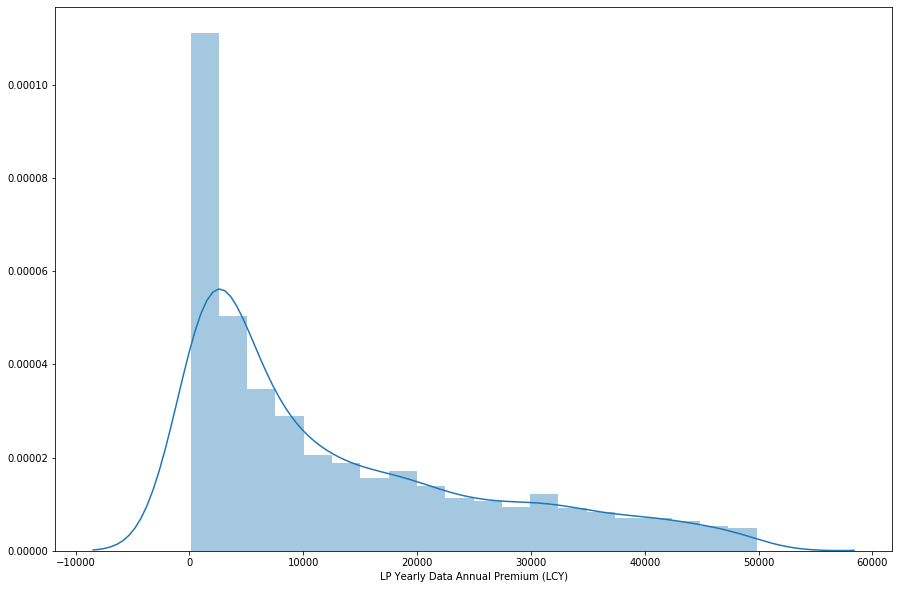

In [53]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['LP Yearly Data Annual Premium (LCY)'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
LP Status,-3.229906e-12
LP Yearly Data Insured Lives,2.550711e+05
LP Yearly Data Pooling Status,6.270624e+16
HQ Insured Lives,-2.377556e+02
HQ Pooled Lives,-2.314611e+03
HQ Potential,-1.147138e+03
lp_substatus__In action,1.199532e+16
lp_substatus__Terminated,1.199532e+16
hq_region_Asia-Pacific,3.625402e+16
hq_region_Europe,3.625402e+16


In [55]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
print(df1)

           Actual  Predicted
2161   6310.80450    14672.0
1038  23785.00000     9680.0
1343  18510.12000    24016.0
489   24714.72000    19088.0
1753   8069.76000    10896.0
2200  36095.49000    13920.0
666    1894.32000    13216.0
1366   6356.13000    11888.0
553   12153.71368    15184.0
2668  19404.13380    13344.0
248   11547.36000     7648.0
1604   1585.44000     9392.0
1881   2512.08000     9872.0
104   19959.48000     7856.0
2405   4268.16072    10240.0
1287  48156.12000    12768.0
1864   3251.88000    11072.0
2701    441.74235    10352.0
1059  25916.76000    18896.0
2559  13958.55450    10304.0
15    10122.06000    11328.0
806     658.04697     7264.0
1599   1760.40000     5888.0
2254  11943.72000    13728.0
615   47754.80661    14288.0


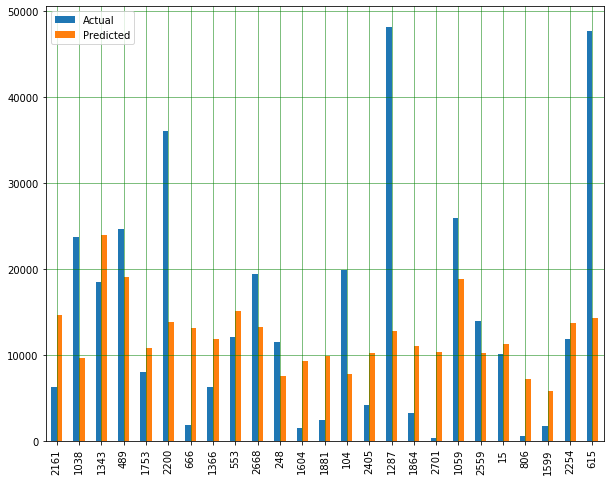

In [56]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [57]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9564.321535569621
Mean Squared Error: 141202100.17952123
Root Mean Squared Error: 11882.84899254052
